In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
nifty_df = pd.read_csv('Data/Nifty50.csv')
nifty_df.Date = pd.to_datetime(nifty_df['Date'])

nifty_df['bollinger'] = nifty_df['Close'].rolling(14).mean()
std = nifty_df['Close'].rolling(14).std()
nifty_df['upper'] = nifty_df['bollinger'] + 2 * std 
nifty_df['lower'] = nifty_df['bollinger'] - 2 * std
nifty_df = nifty_df.dropna()

#Creating a new column 'Call' , whose entries are - 
#'Buy' if the stock price is below the lower Bollinger band 
#'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band 
#'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band 
#'Short' if the stock price is above the upper Bollinger band

conditions = [
    (nifty_df.Open < nifty_df['lower']),
    (nifty_df.Open > nifty_df['lower']) & (nifty_df.Open < nifty_df["bollinger"]),
    (nifty_df.Open < nifty_df['upper']) & (nifty_df.Open > nifty_df["bollinger"]),
    (nifty_df.Open > nifty_df['upper'])
    ]

choices = ['Buy', 'Hold Buy', 'Hold Short', "Short"]
nifty_df["Call"] = np.select(conditions, choices)

(nifty_df.head(5))

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),bollinger,upper,lower,Call
13,2017-06-01,9603.55,9634.65,9589.90,9616.10,181533283,9482.61,9506.953571,9693.707883,9320.199260,Hold Short
14,2017-06-02,9657.15,9673.50,9637.45,9653.50,167195027,8564.30,9521.817857,9720.230456,9323.405258,Hold Short
15,2017-06-05,9656.30,9687.20,9640.70,9675.10,131685021,7192.24,9533.450000,9747.893211,9319.006789,Hold Short
16,2017-06-06,9704.25,9709.30,9630.20,9637.15,150379695,8416.55,9541.407143,9762.775002,9320.039284,Hold Short
17,2017-06-07,9663.95,9678.55,9630.55,9663.90,165669924,8989.36,9558.153571,9778.507146,9337.799997,Hold Short


In [3]:
#training a classification model with the 3 bollinger columns and the stock price as inputs and 'Calls' as output.
X = nifty_df[['lower','bollinger', 'upper']].values
Y = nifty_df["Call"].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

#knn classifier
knn_model = KNeighborsClassifier(4, n_jobs=-1)
knn_model.fit(X_train, Y_train)
print("KNN\'s Score = ", knn_model.score(X_test, Y_test))

#logistic regression
lr_model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')
lr_model.fit(X_train, Y_train)
print("Logistic Regression", lr_model.score(X_test, Y_test))

#svm svm_model
svm_model = svm.SVC(gamma='auto', decision_function_shape='ovo')
svm_model.fit(X_train, Y_train)
print("SVM\'s Score = ", svm_model.score(X_test, Y_test))

#random forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)  
rf_model.fit(X_train, Y_train)  
print("RandomForest\'s Score = ", rf_model.score(X_test, Y_test))

KNN's Score =  0.6
Logistic Regression 0.6758620689655173
SVM's Score =  0.6206896551724138
RandomForest's Score =  0.6275862068965518


In [4]:
#Importing a stock data file
hdf = pd.read_csv('Data/HINDUNILVR.csv')
hdf = hdf[hdf["Series"] == "EQ"]
hdf.Date = pd.to_datetime(hdf['Date'])

hdf['bollinger'] = hdf['Close Price'].rolling(14).mean()
std = hdf['Close Price'].rolling(14).std()
hdf['upper'] = hdf['bollinger'] + 2 * std 
hdf['lower'] = hdf['bollinger'] - 2 * std
hdf = hdf.dropna()
hdf.head(5)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,bollinger,upper,lower
13,HINDUNILVR,EQ,2017-06-01,1067.00,1067.00,1099.45,1061.2,1094.55,1095.35,1091.65,1782269,1.945607e+09,69057,1160309,65.10,1033.167857,1101.492204,964.843511
14,HINDUNILVR,EQ,2017-06-02,1095.35,1100.05,1103.00,1046.1,1085.00,1086.40,1083.08,2216247,2.400379e+09,40705,1803842,81.39,1040.535714,1107.911988,973.159441
15,HINDUNILVR,EQ,2017-06-05,1086.40,1092.00,1101.30,1088.0,1095.00,1097.75,1096.57,612171,6.712884e+08,35182,355028,57.99,1047.489286,1117.079837,977.898734
16,HINDUNILVR,EQ,2017-06-06,1097.75,1097.95,1101.80,1087.0,1091.00,1091.55,1092.44,1203091,1.314305e+09,29449,915629,76.11,1053.357143,1122.966502,983.747784
17,HINDUNILVR,EQ,2017-06-07,1091.55,1105.20,1114.25,1091.5,1106.00,1106.35,1107.07,2392047,2.648170e+09,81560,1666883,69.68,1061.650000,1126.364010,996.935990


In [5]:
#SVM Model
X = hdf[['lower','bollinger', 'upper']].values
hdf["Call Pridicted"] = svm_model.predict(X)
print(hdf[["Open Price", 'bollinger', 'upper', 'lower', 'Call Pridicted']].head(5))

    Open Price    bollinger        upper       lower Call Pridicted
13     1067.00  1033.167857  1101.492204  964.843511     Hold Short
14     1100.05  1040.535714  1107.911988  973.159441     Hold Short
15     1092.00  1047.489286  1117.079837  977.898734     Hold Short
16     1097.95  1053.357143  1122.966502  983.747784     Hold Short
17     1105.20  1061.650000  1126.364010  996.935990     Hold Short


In [6]:
#Importing a stock data file
titan_df = pd.read_csv("Data/TITAN.csv")
titan_df.Date = pd.to_datetime(titan_df['Date'])
titan_df = titan_df.set_index('Date')

#Defining 4 new columns , whose values are: 
#% change between Open and Close price for the day 
#% change between Low and High price for the day 
#5 day rolling mean of the day to day % change in Close Price 
#5 day rolling std of the day to day % change in Close Price

titan_df['%_open_close'] = (titan_df['Close Price'] - titan_df['Open Price'])/titan_df['Open Price'] *100
titan_df['%_low_high'] = (titan_df['High Price'] - titan_df['Low Price'])/titan_df['Low Price'] *100
titan_df['rolling_mean_5'] = titan_df['Close Price'].rolling(5).mean()
titan_df["std_5"] = titan_df['Close Price'].rolling(5).std()
titan_df.dropna()
titan_df.head(5)

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,%_open_close,%_low_high,rolling_mean_5,std_5
Date,,,,,,,,,,,,,,,,,,
2017-05-15,TITAN,EQ,495.00,489.65,490.0,472.40,486.00,483.65,479.93,3897357,1.870465e+09,52478,1722661,44.20,-1.225365,3.725656,NaN,NaN
2017-05-16,TITAN,EQ,483.65,486.00,491.0,480.80,490.00,488.30,487.32,1308863,6.378316e+08,33942,563667,43.07,0.473251,2.121464,NaN,NaN
2017-05-17,TITAN,EQ,488.30,490.00,490.1,477.30,481.00,481.75,482.25,859054,4.142814e+08,26686,448314,52.19,-1.683673,2.681752,NaN,NaN
2017-05-18,TITAN,EQ,481.75,479.00,482.6,470.05,470.85,471.65,474.78,811219,3.851526e+08,24621,438716,54.08,-1.534447,2.669929,NaN,NaN
2017-05-19,TITAN,EQ,471.65,475.00,479.5,460.35,469.65,471.15,469.05,1022479,4.795891e+08,27225,263561,25.78,-0.810526,4.159878,479.3,7.597203


In [7]:
#Creating a new column 'Action' whose values are: 
#1 if next day's price(Close) is greater than present day's. 
#(-1) if next day's price(Close) is less than present day's. 
#i.e. Action [ i ] = 1 if Close[ i+1 ] > Close[ i ] 
#i.e. Action [ i ] = (-1) if Close[ i+1 ] < Close[ i ]

val=[]
for i in range(titan_df['Close Price'][:-1].shape[0]):
    if titan_df['Close Price'][i] < titan_df['Close Price'][i+1]:
        val.append(1)
    elif titan_df['Close Price'][i] > titan_df['Close Price'][i+1]:
        val.append(-1)
    else: 
        val.append("NaN")
val.append('NaN')

titan_df["Action"] = np.array([val]).reshape((len(val),1))
titan_df=titan_df.dropna()

In [8]:
#Constructing a classification model with the 4 new inputs and 'Action' as target
X = titan_df[['%_open_close', '%_low_high', 'rolling_mean_5', "std_5"]].values
Y = titan_df.Action.values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

#randomforest classifier
rf = RandomForestClassifier(n_estimators=5, random_state=42)
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)

print("RandomForest\'s Score = ", rf.score(X_test, Y_test))

RandomForest's Score =  0.44594594594594594


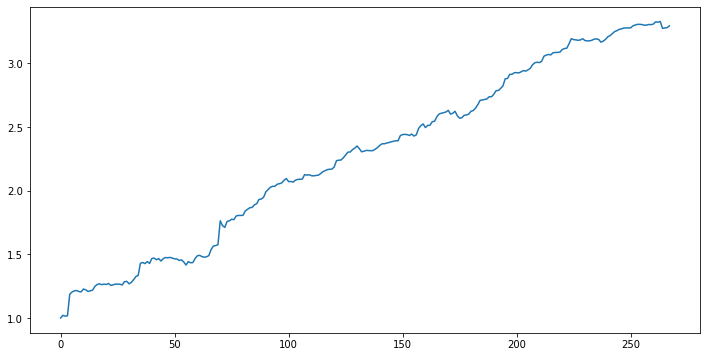

In [9]:
X = titan_df[['%_open_close', '%_low_high', 'rolling_mean_5', "std_5"]].values
pred_y = rf.predict(X)[:-1].astype('float')
pred_y = np.hstack((1, pred_y))

raw = np.array([i*j for i, j in zip(pred_y, titan_df['Close Price'])])
temp = [1, ]

for i in range(1, len(pred_y)):
    if pred_y[i] < 1:
        continue    
    else:
        profit = (titan_df['Close Price'][i] - abs(titan_df['Close Price'][i-1])) / abs(titan_df['Close Price'][i-1])
        temp.append(profit)

returns_perc = []
for i in range(1, len(temp)):
    returns_perc.append(np.sum(temp[:i]))

plt.figure(figsize=(12,6))
plt.plot(range(len(returns_perc)), returns_perc)
plt.show()